In [1]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import random
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import copy

In [2]:
data = pd.read_json("datasetTest100k.json", typ="frame", lines = True, precise_float=True,nrows = 5*100000)

In [3]:
#from RealisticDataExplorer.ipynb
trkData = np.stack(data[3],axis=0)

trk_high_level_name = ["track_2_d0_significance", "track_3_d0_significance",
                       "track_2_z0_significance", "track_3_z0_significance",
                       "n_tracks_over_d0_threshold", "jet_prob", "jet_width_eta", "jet_width_phi"]

for i, trkName in enumerate(trk_high_level_name):
    tmpArr = np.array(trkData[:,i],dtype="float32")
    data[trkName] = tmpArr

vtxData = np.stack(data[4],axis=0)
    
vtx_high_level_name = ["vertex_significance", "n_secondary_vertices", "n_secondary_vertex_tracks",
                       "delta_r_vertex", "vertex_mass", "vertex_energy_fraction"]

for i, vtxName in enumerate(vtx_high_level_name):
    tmpArr = np.array(vtxData[:,i],dtype="float32")
    data[vtxName] = tmpArr

In [4]:
data

,0,1,2,3,4,5,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
0,47.8712,1.893250,5,"[21.1765, 8.36586, 29.0269, 4.149, 5, 2.68624e...","[32.8902, 3, 7, 0.162448, 1.59408, 0.862678]","[[[0.0311627, 0.0820037, 0.0714865, 0.0122187,...",21.176500,8.365860,29.026899,4.149000,5.0,2.686240e-11,0.059397,0.060374,32.890202,3.0,7.0,0.162448,1.594080,0.862678
1,34.9703,0.609755,5,"[5.0077, 3.03583, 2.00754, 0.329921, 3, 1.7627...","[25.1935, 1, 3, 0.122343, 2.23962, 0.930327]","[[[-0.0290837, 0.122745, 0.311415, 0.054644, -...",5.007700,3.035830,2.007540,0.329921,3.0,1.762730e-05,0.066609,0.149812,25.193501,1.0,3.0,0.122343,2.239620,0.930327
2,26.5706,-0.530268,5,"[0.807884, 0.630565, 1.04452, 1.28336, 0, 0.04...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00689455, -0.379085, 0.0617111, -0.02322...",0.807884,0.630565,1.044520,1.283360,0.0,4.808580e-02,0.097381,0.113961,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
3,36.9246,-2.074420,5,"[16.5617, 10.357, 17.5166, 30.4992, 4, 4.35319...","[73.6335, 1, 2, 0.259107, 0.755648, 0.594634]","[[[0.0183914, -0.00212568, -0.0371647, -0.0217...",16.561701,10.357000,17.516600,30.499201,4.0,4.353190e-10,0.162495,0.115695,73.633499,1.0,2.0,0.259107,0.755648,0.594634
4,28.9667,1.512090,5,"[18.0325, 16.1445, 3.29359, 9.00347, 4, 3.3143...","[293.79, 1, 4, 0.0871323, 1.40008, 1.00014]","[[[-0.753196, 3.5972, -0.11093, 0.0896224, -0....",18.032499,16.144501,3.293590,9.003470,4.0,3.314360e-11,0.088521,0.093888,293.790009,1.0,4.0,0.087132,1.400080,1.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,27.9514,-1.952300,0,"[0.594449, -inf, 0.17506, -inf, 0, 0.0520256, ...","[-1, -1, -1, inf, -1, -inf]","[[[0.0148769, -0.0165837, 0.0171593, 0.0010783...",0.594449,-inf,0.175060,-inf,0.0,5.202560e-02,0.124974,0.119607,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199996,31.7411,0.581113,0,"[0.884008, 0.0586451, 2.08934, 1.0856, 1, 4.22...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00236544, 0.264679, 0.0364315, 0.115328,...",0.884008,0.058645,2.089340,1.085600,1.0,4.225840e-05,0.128962,0.088855,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199997,43.4182,-1.354190,0,"[2.01423, 0.0571862, 0.018169, 0.646206, 2, 0....","[-1, -1, -1, inf, -1, -inf]","[[[-0.0641859, -0.00209336, -0.0657659, -0.005...",2.014230,0.057186,0.018169,0.646206,2.0,1.049350e-02,0.110870,0.065049,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199998,25.8566,-2.288910,0,"[1.1272, 0.794378, 0.415697, 0.0726794, 0, 0.0...","[-1, -1, -1, inf, -1, -inf]","[[[-0.0150902, 0.204454, -0.3825, -0.0139872, ...",1.127200,0.794378,0.415697,0.072679,0.0,1.737710e-02,0.077444,0.083011,-1.000000,-1.0,-1.0,inf,-1.000000,-inf


In [5]:
y = data[2]
y = y.values.tolist()

for i in range(len(y)):
    if y[i]==5:
        y[i]=1
    else:
        y[i]=0

In [6]:
jets_trk = []
for i in range(0,200000):
    trkVars = []
    for j in range(len(data[5][i])):
        trkVars.append(data[5][i][j][0])
    jets_trk.append(trkVars)

In [7]:
d0 = []
for i in jets_trk:
    temp = []
    for j in i:
        temp.append(j[0])
    d0.append(temp)

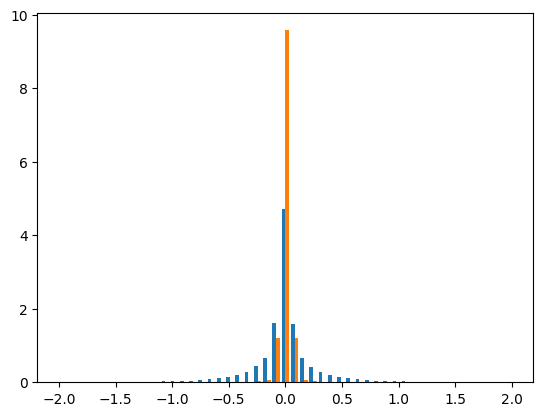

In [8]:
bj=[]
lf=[]
for i in range(len(y)):
    assert len(d0)==len(y)
    if y[i]==1:
        bj.append(d0[i])
    else:
        assert y[i]==0
        lf.append(d0[i])

def flatten(inData): 
    dataFlat = np.array([])
    for jet in inData:
        dataFlat = np.append(dataFlat,jet)
    return dataFlat
bj_d0_flat = flatten(bj)
lf_d0_flat = flatten(lf)
counts, bins, _ = plt.hist([bj_d0_flat,lf_d0_flat], bins=np.linspace(-2,2,50),density=True)

In [9]:
def probInHist(d0, counts, bins): #counts is list of lists
    x=len(bins)-2
    for i in range(len(bins)): 
        if d0 < bins[i]:
            x=i-1
            break
    p=(counts[0][x])/(counts[1][x])
    return p

def likelihood(test, train_hist_counts, train_hist_bins):
    p=[]
    for i in test:
        pi=1
        for j in i:
            pi = pi*probInHist(j,train_hist_counts, train_hist_bins)
        p.append(pi) 
    return p

bj_2d = copy.deepcopy(bj)
lf_2d = copy.deepcopy(lf)

for i in bj_2d:
    while len(i)>2:
        i.remove(min(i))
    while len(i)<2:
        i.append(0)

for i in lf_2d:
    while len(i)>2:
        i.remove(min(i))
    while len(i)<2:
        i.append(0)

res_b = likelihood(bj_2d,counts,bins)
res_lf = likelihood(lf_2d,counts,bins)


(array([[0.0000e+00, 1.9513e+04, 0.0000e+00, 1.4356e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 8.4410e+03, 0.0000e+00,
         1.5200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         2.9000e+01, 0.0000e+00, 3.5000e+01, 2.0000e+00, 0.0000e+00,
         2.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 2.1000e+01,
         7.5000e+01, 0.0000e+00, 1.7400e+02, 0.0000e+00, 4.3000e+02,
         3.3150e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 4.0000e+00, 3.3000e+01, 7.1000e+01,
         3.0000e+00, 1.1000e+02, 1.8630e+03, 4.8000e+01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 2.5200e+02, 4.2614e+04],
        [0.0000e+00, 7.2030e+04, 0.0000e+00, 2.5194e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2400e+03, 0.0000e+00,
         2.3600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         2.0000e+01, 0.0000e+00, 2.7000e+01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 

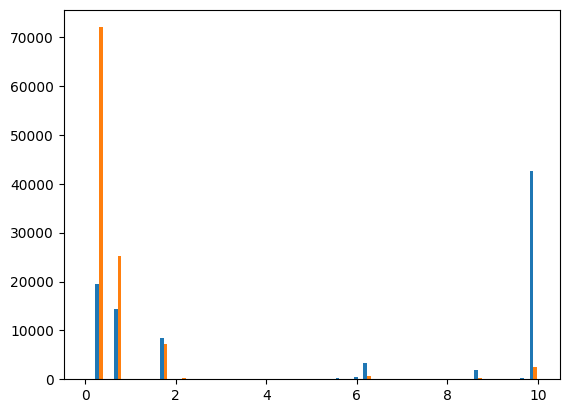

In [10]:
for i in range(len(res_b)):
    if res_b[i]>10:
        res_b[i]=10

for i in range(len(res_lf)):
    if res_lf[i]>10:
        res_lf[i]=10
        
plt.hist([res_b,res_lf],bins=np.linspace(0,10,50))

In [11]:
#shuffle
Xzip = list(zip(y,d0))
random.shuffle(Xzip)
y, d0 = list(zip(*Xzip))
#padding
for i in d0:
    while len(i)<5:
        i.append(-99)
    while len(i)>5:
        i.remove(min(i))
#picking out training and test data
y_train = y[0:160000]
y_test = y[160000:200000]
d0_train = d0[0:160000]
d0_test = d0[160000:200000]

d0_train = torch.tensor(d0_train,dtype=torch.float32)
d0_test = torch.tensor(d0_test,dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [12]:

simpleModel = nn.Sequential(
   nn.Linear(5,10),
   nn.Sigmoid(),
   nn.Linear(10,7),
   nn.Sigmoid(),
   nn.Linear(7,5),
   nn.Sigmoid(),
   nn.Linear(5,3),
   nn.Sigmoid(),
   nn.Linear(3,2),
   nn.Sigmoid(),
   nn.Linear(2,1),
   nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer=optim.Adam(simpleModel.parameters(),lr = 0.01)

In [13]:
n_epochs = 100
batch_size = 100
 
for epoch in range(n_epochs):
    for i in range(0, len(d0_train), batch_size):
        Xbatch = d0_train[i:i+batch_size]
        y_pred = simpleModel(Xbatch)
        ybatch = y_train[i:i+batch_size]
        #print(y_pred[0], ybatch[0])
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.5198017358779907
Finished epoch 1, latest loss 0.5194013714790344
Finished epoch 2, latest loss 0.5186477899551392
Finished epoch 3, latest loss 0.5179837942123413
Finished epoch 4, latest loss 0.5176362991333008
Finished epoch 5, latest loss 0.5176941156387329
Finished epoch 6, latest loss 0.5176761746406555
Finished epoch 7, latest loss 0.5175861716270447
Finished epoch 8, latest loss 0.5174837708473206
Finished epoch 9, latest loss 0.5174533724784851
Finished epoch 10, latest loss 0.517519474029541
Finished epoch 11, latest loss 0.517378032207489
Finished epoch 12, latest loss 0.5171771049499512
Finished epoch 13, latest loss 0.5164968967437744
Finished epoch 14, latest loss 0.5159832239151001
Finished epoch 15, latest loss 0.5123239755630493
Finished epoch 16, latest loss 0.5112835168838501
Finished epoch 17, latest loss 0.5109732151031494
Finished epoch 18, latest loss 0.5108811259269714
Finished epoch 19, latest loss 0.5108036994934082
Finished epo

In [14]:
with torch.no_grad():
    y_pred = simpleModel(d0_test)
    print(y_pred)
accuracy = (y_pred.round() == y_test).float().mean()
print(f"Accuracy {accuracy}")

tensor([[0.9890],
        [0.9891],
        [0.3757],
        ...,
        [0.3195],
        [0.1963],
        [0.3757]])
Accuracy 0.7083749771118164


In [15]:
data

,0,1,2,3,4,5,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
0,47.8712,1.893250,5,"[21.1765, 8.36586, 29.0269, 4.149, 5, 2.68624e...","[32.8902, 3, 7, 0.162448, 1.59408, 0.862678]","[[[0.0311627, 0.0820037, 0.0714865, 0.0122187,...",21.176500,8.365860,29.026899,4.149000,5.0,2.686240e-11,0.059397,0.060374,32.890202,3.0,7.0,0.162448,1.594080,0.862678
1,34.9703,0.609755,5,"[5.0077, 3.03583, 2.00754, 0.329921, 3, 1.7627...","[25.1935, 1, 3, 0.122343, 2.23962, 0.930327]","[[[-0.0290837, 0.122745, 0.311415, 0.054644, -...",5.007700,3.035830,2.007540,0.329921,3.0,1.762730e-05,0.066609,0.149812,25.193501,1.0,3.0,0.122343,2.239620,0.930327
2,26.5706,-0.530268,5,"[0.807884, 0.630565, 1.04452, 1.28336, 0, 0.04...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00689455, -0.379085, 0.0617111, -0.02322...",0.807884,0.630565,1.044520,1.283360,0.0,4.808580e-02,0.097381,0.113961,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
3,36.9246,-2.074420,5,"[16.5617, 10.357, 17.5166, 30.4992, 4, 4.35319...","[73.6335, 1, 2, 0.259107, 0.755648, 0.594634]","[[[0.0183914, -0.00212568, -0.0371647, -0.0217...",16.561701,10.357000,17.516600,30.499201,4.0,4.353190e-10,0.162495,0.115695,73.633499,1.0,2.0,0.259107,0.755648,0.594634
4,28.9667,1.512090,5,"[18.0325, 16.1445, 3.29359, 9.00347, 4, 3.3143...","[293.79, 1, 4, 0.0871323, 1.40008, 1.00014]","[[[-0.753196, 3.5972, -0.11093, 0.0896224, -0....",18.032499,16.144501,3.293590,9.003470,4.0,3.314360e-11,0.088521,0.093888,293.790009,1.0,4.0,0.087132,1.400080,1.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,27.9514,-1.952300,0,"[0.594449, -inf, 0.17506, -inf, 0, 0.0520256, ...","[-1, -1, -1, inf, -1, -inf]","[[[0.0148769, -0.0165837, 0.0171593, 0.0010783...",0.594449,-inf,0.175060,-inf,0.0,5.202560e-02,0.124974,0.119607,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199996,31.7411,0.581113,0,"[0.884008, 0.0586451, 2.08934, 1.0856, 1, 4.22...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00236544, 0.264679, 0.0364315, 0.115328,...",0.884008,0.058645,2.089340,1.085600,1.0,4.225840e-05,0.128962,0.088855,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199997,43.4182,-1.354190,0,"[2.01423, 0.0571862, 0.018169, 0.646206, 2, 0....","[-1, -1, -1, inf, -1, -inf]","[[[-0.0641859, -0.00209336, -0.0657659, -0.005...",2.014230,0.057186,0.018169,0.646206,2.0,1.049350e-02,0.110870,0.065049,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199998,25.8566,-2.288910,0,"[1.1272, 0.794378, 0.415697, 0.0726794, 0, 0.0...","[-1, -1, -1, inf, -1, -inf]","[[[-0.0150902, 0.204454, -0.3825, -0.0139872, ...",1.127200,0.794378,0.415697,0.072679,0.0,1.737710e-02,0.077444,0.083011,-1.000000,-1.0,-1.0,inf,-1.000000,-inf


In [16]:
high_lev_data = data.loc[:,'track_2_d0_significance' : 'n_tracks_over_d0_threshold']

In [17]:
high_lev_data

,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold
0,21.176500,8.365860,29.026899,4.149000,5.0
1,5.007700,3.035830,2.007540,0.329921,3.0
2,0.807884,0.630565,1.044520,1.283360,0.0
3,16.561701,10.357000,17.516600,30.499201,4.0
4,18.032499,16.144501,3.293590,9.003470,4.0
...,...,...,...,...,...
199995,0.594449,-inf,0.175060,-inf,0.0
199996,0.884008,0.058645,2.089340,1.085600,1.0
199997,2.014230,0.057186,0.018169,0.646206,2.0
199998,1.127200,0.794378,0.415697,0.072679,0.0


In [18]:
no_inf = data[high_lev_data["track_2_d0_significance"] != (-np.inf or np.inf)]
#infs = data[data["track_2_d0_significance"] == (-np.inf or np.inf)]
no_inf = no_inf[no_inf["track_3_d0_significance"] != (-np.inf or np.inf)]
no_inf = no_inf[no_inf["track_2_z0_significance"] != (-np.inf or np.inf)]
no_inf = no_inf[no_inf["track_3_z0_significance"] != (-np.inf or np.inf)]
print(no_inf.shape)
#print(infs.shape)

(154644, 20)


In [19]:
high_lev_y = no_inf[2]
high_lev_y = high_lev_y.values.tolist()
for i in range(len(high_lev_y)):
    if high_lev_y[i]==5:
        high_lev_y[i]=1
    else:
        high_lev_y[i]=0

high_lev_x = no_inf[3]
high_lev_x = high_lev_x.values.tolist()
for i in high_lev_x:
    i.pop(-1)
    i.pop(-1)
    i.pop(-1)


In [20]:
high_level_vars_zip = list(zip(high_lev_y,high_lev_x))
random.shuffle(high_level_vars_zip)
high_lev_y, high_lev_x = list(zip(*high_level_vars_zip))

high_lev_x_train = high_lev_x[0:100000]
high_lev_x_test = high_lev_x[100000:len(high_lev_x)]
high_lev_y_train = high_lev_y[0:100000]
high_lev_y_test = high_lev_y[100000:len(high_lev_y)]

In [21]:
high_lev_y_train = torch.tensor(high_lev_y, dtype=torch.float32).reshape(-1, 1)
high_lev_y_test = torch.tensor(high_lev_y, dtype=torch.float32).reshape(-1, 1)
high_lev_x_train = torch.tensor(high_lev_x, dtype=torch.float32)
high_lev_x_test = torch.tensor(high_lev_x, dtype=torch.float32)

In [28]:
high_lev_x_test

tensor([[3.0019e-01, 2.4762e-01, 9.5419e-01, 8.4696e-01, 0.0000e+00],
        [1.1744e+01, 3.4354e+00, 6.0418e+00, 2.6472e-02, 3.0000e+00],
        [2.3150e+00, 1.7145e+00, 2.7942e+00, 1.1865e-01, 2.0000e+00],
        ...,
        [9.3182e-01, 9.0040e-01, 6.5318e-01, 4.6234e-03, 0.0000e+00],
        [2.0456e-01, 1.4194e-01, 3.7356e-01, 9.8961e-01, 0.0000e+00],
        [8.8674e-01, 9.2491e-01, 1.3029e+00, 3.2367e-01, 0.0000e+00]])

In [29]:
n_epochs = 100
batch_size = 100
 
for epoch in range(n_epochs):
    for i in range(0, len(high_lev_x_train), batch_size):
        Xbatch = high_lev_x_train[i:i+batch_size]
        y_pred = simpleModel(Xbatch)
        ybatch = high_lev_y_train[i:i+batch_size]
        #print(y_pred[0], ybatch[0])
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

with torch.no_grad():
    y_pred = simpleModel(high_lev_x_test)
    print(y_pred)
accuracy = (y_pred.round() == high_lev_y_test).float().mean()
print(f"Accuracy {accuracy}")

Finished epoch 0, latest loss 0.356192946434021
Finished epoch 1, latest loss 0.34717971086502075
Finished epoch 2, latest loss 0.3501185178756714
Finished epoch 3, latest loss 0.35127079486846924
Finished epoch 4, latest loss 0.35670506954193115
Finished epoch 5, latest loss 0.35098928213119507
Finished epoch 6, latest loss 0.35338321328163147
Finished epoch 7, latest loss 0.3553532063961029
Finished epoch 8, latest loss 0.3494899868965149
Finished epoch 9, latest loss 0.35202106833457947
Finished epoch 10, latest loss 0.34978052973747253
Finished epoch 11, latest loss 0.35340240597724915
Finished epoch 12, latest loss 0.3509931266307831
Finished epoch 13, latest loss 0.35108682513237
Finished epoch 14, latest loss 0.3505593538284302
Finished epoch 15, latest loss 0.3516254425048828
Finished epoch 16, latest loss 0.35207435488700867
Finished epoch 17, latest loss 0.3498471975326538
Finished epoch 18, latest loss 0.3581680953502655
Finished epoch 19, latest loss 0.35816919803619385
Fin